## Atakan Özdin - Reengen Case Study

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

import pandas as pd

In [2]:
data = pd.read_excel("energy.xlsx")

### Exploratory Data Analysis (EDA):

In [3]:
df = data.copy()

In [4]:
df.head()

,datetime,consumption (kWh),temperature (Celsius)
0,1.01.2018 00:00,816.0,7.00
1,1.01.2018 01:00,760.0,7.57
2,1.01.2018 02:00,752.0,7.50
3,1.01.2018 03:00,748.0,7.50
4,1.01.2018 04:00,778.0,NaN


In [5]:
df.shape

(17491, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17491 entries, 0 to 17490
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   datetime               17491 non-null  object 
 1   consumption (kWh)      17459 non-null  float64
 2   temperature (Celsius)  16230 non-null  float64
dtypes: float64(2), object(1)
memory usage: 410.1+ KB


In [7]:
df.isnull().sum()

datetime                    0
consumption (kWh)          32
temperature (Celsius)    1261
dtype: int64

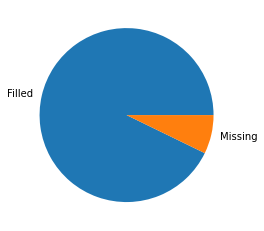

Filled Rows: 92.7905780115488
Missing Rows: 7.209421988451203


In [8]:
filled= ((17491-1261)*100/17491)
missing= (1261*100/17491)

y = np.array([filled, missing])
mylabels = ["Filled", "Missing"]

plt.pie(y, labels = mylabels)
plt.show()

print("Filled Rows: "+str(filled)+"\n"+ "Missing Rows: "+str(missing))

#### Missing rows include 7.2% of all data so, we can ignore and delete missing rows

In [9]:
df.dropna(inplace=True)

In [10]:
df.head()

,datetime,consumption (kWh),temperature (Celsius)
0,1.01.2018 00:00,816.0,7.00
1,1.01.2018 01:00,760.0,7.57
2,1.01.2018 02:00,752.0,7.50
3,1.01.2018 03:00,748.0,7.50
5,1.01.2018 05:00,822.0,7.25


In [11]:
df.shape

(16198, 3)

In [12]:
df.isnull().sum()

datetime                 0
consumption (kWh)        0
temperature (Celsius)    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16198 entries, 0 to 17490
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   datetime               16198 non-null  object 
 1   consumption (kWh)      16198 non-null  float64
 2   temperature (Celsius)  16198 non-null  float64
dtypes: float64(2), object(1)
memory usage: 506.2+ KB


In [14]:
df.tail()

,datetime,consumption (kWh),temperature (Celsius)
17486,31.12.2019 19:00,930.0,5.83
17487,31.12.2019 20:00,889.0,5.45
17488,31.12.2019 21:00,890.0,5.26
17489,31.12.2019 22:00,689.0,5.16
17490,31.12.2019 23:00,897.0,5.01


#### we are continuing with 16131-row data that is not missing

## Forecasting

In [15]:
df['datetime']=pd.to_datetime(df.datetime.str[:16])

In [16]:
fh_new=24*31+1
date=pd.date_range(start=df.datetime.tail(1).iloc[0],periods=fh_new,freq='H',name='date')
#date=pd.DataFrame(date)

date

DatetimeIndex(['2019-12-31 23:00:00', '2020-01-01 00:00:00',
               '2020-01-01 01:00:00', '2020-01-01 02:00:00',
               '2020-01-01 03:00:00', '2020-01-01 04:00:00',
               '2020-01-01 05:00:00', '2020-01-01 06:00:00',
               '2020-01-01 07:00:00', '2020-01-01 08:00:00',
               ...
               '2020-01-31 14:00:00', '2020-01-31 15:00:00',
               '2020-01-31 16:00:00', '2020-01-31 17:00:00',
               '2020-01-31 18:00:00', '2020-01-31 19:00:00',
               '2020-01-31 20:00:00', '2020-01-31 21:00:00',
               '2020-01-31 22:00:00', '2020-01-31 23:00:00'],
              dtype='datetime64[ns]', name='date', length=745, freq='H')

In [17]:
date = pd.DataFrame(index=date,columns=df.columns)
date.tail()

,datetime,consumption (kWh),temperature (Celsius)
date,,,
2020-01-31 19:00:00,NaN,NaN,NaN
2020-01-31 20:00:00,NaN,NaN,NaN
2020-01-31 21:00:00,NaN,NaN,NaN
2020-01-31 22:00:00,NaN,NaN,NaN
2020-01-31 23:00:00,NaN,NaN,NaN


In [18]:
date= date.reset_index()
del date['datetime']

In [19]:
date.rename(columns={'date': 'datetime'}, inplace=True)

In [20]:
df_fe=df.append(date)
df_fe

,datetime,consumption (kWh),temperature (Celsius)
0,2018-01-01 00:00:00,816.0,7.00
1,2018-01-01 01:00:00,760.0,7.57
2,2018-01-01 02:00:00,752.0,7.50
3,2018-01-01 03:00:00,748.0,7.50
5,2018-01-01 05:00:00,822.0,7.25
...,...,...,...
740,2020-01-31 19:00:00,NaN,NaN
741,2020-01-31 20:00:00,NaN,NaN
742,2020-01-31 21:00:00,NaN,NaN
743,2020-01-31 22:00:00,NaN,NaN


In [21]:
def rolling_features(df,fh):
    df_c=df.copy()
    rolling_windows=[fh,fh+3,fh+10,fh+15,fh+20,fh+25]
    lags=[fh,fh+5,fh+10,fh+15,fh+20,fh+30]
    for a in rolling_windows:
        df_c['rolling_mean_'+str(a)]=df_c['consumption (kWh)'].rolling(a,min_periods=1).mean().shift(1)
        df_c['rolling_std_'+str(a)]=df_c['consumption (kWh)'].rolling(a,min_periods=1).std().shift(1)
        df_c['rolling_min_'+str(a)]=df_c['consumption (kWh)'].rolling(a,min_periods=1).min().shift(1)
        df_c['rolling_max_'+str(a)]=df_c['consumption (kWh)'].rolling(a,min_periods=1).max().shift(1)
        df_c['rolling_var_'+str(a)]=df_c['consumption (kWh)'].rolling(a,min_periods=1).var().shift(1)
    for l in lags:
        df_c['consumption_lag_'+str(l)]=df_c['consumption (kWh)'].shift(l)
    return(df_c)

In [22]:
def date_features(df):
    df_c=df.copy()
    df_c['month']=df_c['datetime'].dt.month
    df_c['year']=df_c['datetime'].dt.year
    df_c['hour']=df_c['datetime'].dt.hour
    df_c['quarter']=df_c['datetime'].dt.quarter
    df_c['dayofweek']=df_c['datetime'].dt.dayofweek
    df_c['dayofyear']=df_c['datetime'].dt.dayofyear
    df_c['dayofmonth']=df_c['datetime'].dt.day
    df_c['weekofyear']=df_c['datetime'].dt.weekofyear
    return(df_c)

In [23]:
df_fe=rolling_features(df_fe,fh_new)
df_fe=date_features(df_fe)

In [24]:
df_fe=df_fe[fh_new+30:].reset_index(drop=True)

In [25]:
df_fe.head()

,datetime,consumption (kWh),temperature (Celsius),rolling_mean_745,rolling_std_745,rolling_min_745,rolling_max_745,rolling_var_745,rolling_mean_748,rolling_std_748,...,consumption_lag_765,consumption_lag_775,month,year,hour,quarter,dayofweek,dayofyear,dayofmonth,weekofyear
0,2018-05-03 00:00:00,910.0,6.5,988.708725,835.217564,176.0,20623.0,697588.378754,987.899733,833.636499,...,905.0,816.0,5,2018,0,2,3,123,3,18
1,2018-05-03 02:00:00,1269.0,6.5,988.436242,835.210074,176.0,20623.0,697575.867233,988.054813,833.611169,...,965.0,760.0,5,2018,2,2,3,123,3,18
2,2018-05-03 03:00:00,316.0,6.5,988.532886,835.238405,176.0,20623.0,697623.192801,988.693850,833.643121,...,905.0,752.0,5,2018,3,2,3,123,3,18
3,2018-05-03 05:00:00,1914.0,6.0,974.649664,756.532863,176.0,20623.0,572341.972530,988.078877,833.969839,...,2615.0,748.0,5,2018,5,2,3,123,3,18
4,2018-05-03 14:00:00,1316.0,10.5,976.154362,757.285513,176.0,20623.0,573481.348452,989.149733,834.644446,...,879.0,822.0,5,2018,14,2,3,123,3,18


In [26]:
split_date = df_fe.datetime.tail(fh_new).iloc[0]
historical=df_fe.loc[df_fe.datetime < split_date]
y=historical[['datetime','consumption (kWh)']].set_index('datetime')
X=historical.drop('consumption (kWh)',axis=1).set_index('datetime')
forecast_df=df_fe.loc[df_fe.datetime > split_date].set_index('datetime').drop('consumption (kWh)',axis=1)

In [27]:
X.shape, y.shape

((15422, 45), (15422, 1))

In [28]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from catboost import CatBoostRegressor

In [29]:
tscv = TimeSeriesSplit(n_splits=3,test_size=fh_new)
score_list = []
fold = 1
unseen_preds = []
importance = []

for train_index,test_index in tscv.split(X,y):
    X_train,X_val = X.iloc[train_index],X.iloc[test_index]
    y_train,y_val = y.iloc[train_index],y.iloc[test_index]
    print(X_train.shape,X_val.shape)

    cat = CatBoostRegressor(iterations = 1000, eval_metric='MAE', allow_writing_files=False)
    cat.fit(X_train,y_train,eval_set=[(X_val,y_val)],early_stopping_rounds=150,verbose=50)

    forecast_predicted=cat.predict(forecast_df)
    unseen_preds.append(forecast_predicted)
    score = mean_absolute_error(y_val,cat.predict(X_val))
    print(f"MAE FOLD-{fold}:{score}")
    score_list.append(score)
    importance.append(cat.get_feature_importance())
    fold+=1
print("CV Mean Score:",np.mean(score_list))

(13187, 45) (745, 45)
Learning rate set to 0.076341
0:	learn: 239.6517530	test: 240.4644175	best: 240.4644175 (0)	total: 153ms	remaining: 2m 32s
50:	learn: 97.6319078	test: 115.5143247	best: 115.5143247 (50)	total: 538ms	remaining: 10s
100:	learn: 88.1257282	test: 108.1008585	best: 104.1385602 (92)	total: 865ms	remaining: 7.7s
150:	learn: 83.9155581	test: 105.3053120	best: 104.1385602 (92)	total: 1.16s	remaining: 6.53s
200:	learn: 80.6351395	test: 106.9080418	best: 104.1385602 (92)	total: 1.46s	remaining: 5.8s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 104.1385602
bestIteration = 92

Shrink model to first 93 iterations.
MAE FOLD-1:104.13856121111237
(13932, 45) (745, 45)
Learning rate set to 0.077003
0:	learn: 236.1832758	test: 215.9191575	best: 215.9191575 (0)	total: 8.26ms	remaining: 8.25s
50:	learn: 97.7503503	test: 104.6415594	best: 104.6415594 (50)	total: 314ms	remaining: 5.85s
100:	learn: 88.3046651	test: 100.5889994	best: 100.5352627 (99)	total: 613ms	rem

In [30]:
print(r2_score(y_val,cat.predict(X_val)))

0.5271937704364836


In [31]:
forecasted=pd.DataFrame(unseen_preds[2],columns=["forecasting"]).set_index(forecast_df.index)

In [32]:
forecasted

,forecasting
datetime,
2020-01-01 00:00:00,784.927594
2020-01-01 01:00:00,794.878714
2020-01-01 02:00:00,797.157896
2020-01-01 03:00:00,797.157896
2020-01-01 04:00:00,796.723276
...,...
2020-01-31 19:00:00,859.360357
2020-01-31 20:00:00,849.494729
2020-01-31 21:00:00,834.462881


In [33]:
import plotly.graph_objects as go

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df_fe.datetime.iloc[-fh_new*5:],y=df_fe['consumption (kWh)'].iloc[-fh_new*5:],name='Geçmiş Veriler',mode='lines'))
fig1.add_trace(go.Scatter(x=forecasted.index,y=forecasted['forecasting'],name='Öngörüfig2',mode='lines'))

In [34]:
f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                          pd.Series(importance[2],name="Importance")],axis=1).sort_values(by='Importance')

In [35]:
import plotly.express as px

fig2 = px.bar(f_importance.tail(20), x="Importance", y='Feature')
fig2.show()